## Libraries and Data Loading

In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.pandas.set_option("display.max_columns", None)


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.ensemble import RandomForestRegressor



In [3]:
df= pd.read_csv(r"train.csv",index_col= False)

In [4]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,

## Dimensionality Reduction

Here we are reducing dimensions manually by dropping columns. The choice is intuitive

In [5]:
np.sort(df.columns)

array(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'Alley', 'BedroomAbvGr',
       'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath',
       'BsmtQual', 'BsmtUnfSF', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'EnclosedPorch', 'ExterCond', 'ExterQual',
       'Exterior1st', 'Exterior2nd', 'Fence', 'FireplaceQu', 'Fireplaces',
       'Foundation', 'FullBath', 'Functional', 'GarageArea', 'GarageCars',
       'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType',
       'GarageYrBlt', 'GrLivArea', 'HalfBath', 'Heating', 'HeatingQC',
       'HouseStyle', 'Id', 'KitchenAbvGr', 'KitchenQual', 'LandContour',
       'LandSlope', 'LotArea', 'LotConfig', 'LotFrontage', 'LotShape',
       'LowQualFinSF', 'MSSubClass', 'MSZoning', 'MasVnrArea',
       'MasVnrType', 'MiscFeature', 'MiscVal', 'MoSold', 'Neighborhood',
       'OpenPorchSF', 'OverallCond', 'OverallQual', 'PavedDrive',
       'PoolAre

In [6]:
df_dmrd= df[['PoolQC', 'OverallQual', 'GarageCars', 'GrLivArea', 'SalePrice', 'GarageCond', 'TotRmsAbvGrd']]

In [7]:
print(df['GarageCond'].unique())

['TA' 'Fa' nan 'Gd' 'Po' 'Ex']


In [8]:
# Encoding categorical variables

category_mapping= {'Po':1,'TA':1.5, 'Fa':2, 'Gd':2.5, 'Ex':3}
df_dmrd['GarageCond']= df_dmrd['GarageCond'].map(category_mapping)

C:\Users\PMLS\AppData\Local\Temp\ipykernel_15196\1558017848.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dmrd['GarageCond']= df_dmrd['GarageCond'].map(category_mapping)


In [9]:
print(df_dmrd['GarageCond'].unique())

[1.5 2.  nan 2.5 1.  3. ]


In [10]:
df_dmrd

,PoolQC,OverallQual,GarageCars,GrLivArea,SalePrice,GarageCond,TotRmsAbvGrd
0,NaN,7,2,1710,208500,1.5,8
1,NaN,6,2,1262,181500,1.5,6
2,NaN,7,2,1786,223500,1.5,6
3,NaN,7,3,1717,140000,1.5,7
4,NaN,8,3,2198,250000,1.5,9
...,...,...,...,...,...,...,...
1455,NaN,6,2,1647,175000,1.5,7
1456,NaN,6,2,2073,210000,1.5,7
1457,NaN,7,1,2340,266500,1.5,9
1458,NaN,5,1,1078,142125,1.5,5


In [11]:
df_dmrd.isna().sum()

PoolQC          1453
OverallQual        0
GarageCars         0
GrLivArea          0
SalePrice          0
GarageCond        81
TotRmsAbvGrd       0
dtype: int64

In [12]:
df_dmrd.drop('PoolQC', axis=1, inplace=True)
# axis=1 specifies that we want to delete a column not some row.

C:\Users\PMLS\AppData\Local\Temp\ipykernel_15196\3367946956.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dmrd.drop('PoolQC', axis=1, inplace=True)


In [13]:
df_dmrd

,OverallQual,GarageCars,GrLivArea,SalePrice,GarageCond,TotRmsAbvGrd
0,7,2,1710,208500,1.5,8
1,6,2,1262,181500,1.5,6
2,7,2,1786,223500,1.5,6
3,7,3,1717,140000,1.5,7
4,8,3,2198,250000,1.5,9
...,...,...,...,...,...,...
1455,6,2,1647,175000,1.5,7
1456,6,2,2073,210000,1.5,7
1457,7,1,2340,266500,1.5,9
1458,5,1,1078,142125,1.5,5


In [14]:
df_original=df.copy()
df= df_dmrd.copy()

In [16]:
df.shape

(1460, 6)

In [18]:
df.isna().sum()

OverallQual      0
GarageCars       0
GrLivArea        0
SalePrice        0
GarageCond      81
TotRmsAbvGrd     0
dtype: int64

### No dropna

This time, rather than dropping the missing values, we will fill them and we won't fill them randomly or with mean value but we will first visualize the column with mean value and see the trend and we will fill the Nans according to the trend which makes the most sense.

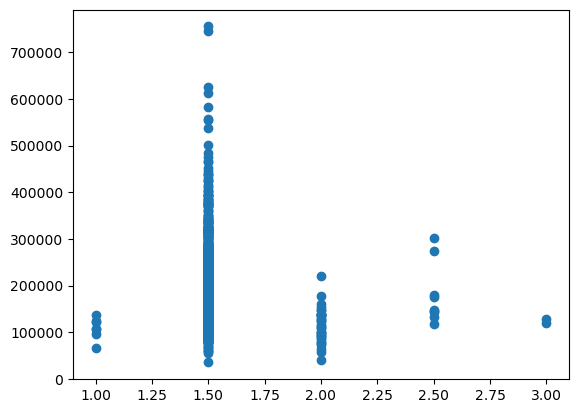

In [19]:
plt.scatter(df['GarageCond'],df['SalePrice'] )
plt.show()

In [20]:
'''Here we are filling Nans using the information from trend.
The preferred method is to use KNNImputer from sklearn.
This method was as a learner's approach.
'''

for indexed,row in df.iterrows():
    
    if pd.isna(df.loc[indexed, 'GarageCond']):
        print(df.loc[indexed,'SalePrice'])
        if df.loc[indexed,'SalePrice']>300000:
            df.loc[indexed,'GarageCond']= 1.50
        elif df.loc[indexed, 'SalePrice']>200000:
            df.loc[indexed,'GarageCond']= 2.50
        else:
            df.loc[indexed,'GarageCond'] =2.00
df['GarageCond']         
    

82000
113000
136500
85000
123600
128950
115000
84500
87000
115000
141000
79000
103200
127500
104000
98000
110500
76500
88000
135900
89500
61000
81000
100000
79900
81000
118000
124000
34900
106250
86000
39300
107500
108000
118500
147000
75500
67000
200000
60000
85000
84500
55000
52000
179000
96500
128000
109500
141000
145900
150000
127500
116500
37900
135000
85500
102000
100000
160000
97000
127000
118000
93500
94000
80000
200500
93000
80500
91500
130000
99900
139000
82500
55000
79000
52500
122000
112000
92000
136000
84500


In [22]:
# Comparing pre and post imputation statistics to see the results of imputation
df['GarageCond'].value_counts()

# 1.5    1326
# 2.0      35
# 2.5       9
# 1.0       7
# 3.0       2

GarageCond
1.5    1326
2.0     115
2.5      10
1.0       7
3.0       2
Name: count, dtype: int64

In [24]:
df.isna().sum()

OverallQual     0
GarageCars      0
GrLivArea       0
SalePrice       0
GarageCond      0
TotRmsAbvGrd    0
dtype: int64

In [25]:
df.dtypes

OverallQual       int64
GarageCars        int64
GrLivArea         int64
SalePrice         int64
GarageCond      float64
TotRmsAbvGrd      int64
dtype: object

In [28]:
# df['GarageCond'].unique()

In [29]:
df.isna().sum()

OverallQual     0
GarageCars      0
GrLivArea       0
SalePrice       0
GarageCond      0
TotRmsAbvGrd    0
dtype: int64

As we are done with data prepocessing, now we move on to fit Linear Regression model to our data.

## Fitting a linear model

In [30]:
X= df[['OverallQual', 'GarageCars', 'GrLivArea']]
Y= df['SalePrice']

X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size= 0.2, random_state=42)

In [32]:
model=LinearRegression()
model.fit(X_train, Y_train)
y_pred= model.predict(X_test)

error= mean_squared_error(y_pred, Y_test)
print("Mean Squared Error: ", error)
r2= r2_score(Y_test, y_pred)
print("Cofficient of Determination is: ", r2)
               

Mean Squared Error:  1851765974.969058
Cofficient of Determination is:  0.7585805446926174


In [33]:
X_train_again

,OverallQual,GarageCars,GrLivArea,Best_Feature
254,5,1,1314,124576.510173
1066,6,2,1571,186003.568246
638,5,0,796,77028.308891
799,5,1,1768,147582.602156
380,5,1,1691,143680.687877
...,...,...,...,...
1095,6,2,1314,172980.295912
1130,4,2,1981,152570.342984
1294,5,2,864,123072.074802
860,7,1,1426,184461.673795


In [34]:
X_train

,OverallQual,GarageCars,GrLivArea
254,5,1,1314
1066,6,2,1571
638,5,0,796
799,5,1,1768
380,5,1,1691
...,...,...,...
1095,6,2,1314
1130,4,2,1981
1294,5,2,864
860,7,1,1426


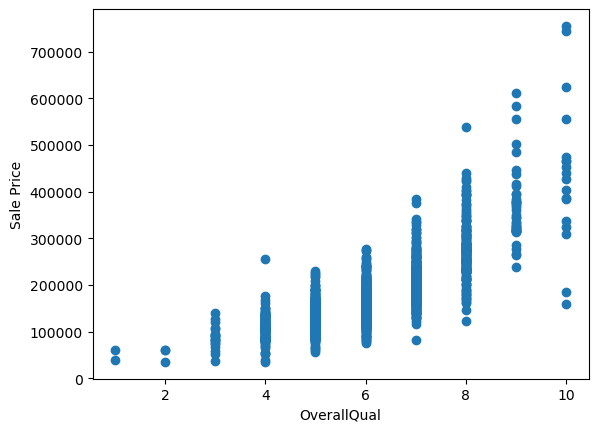

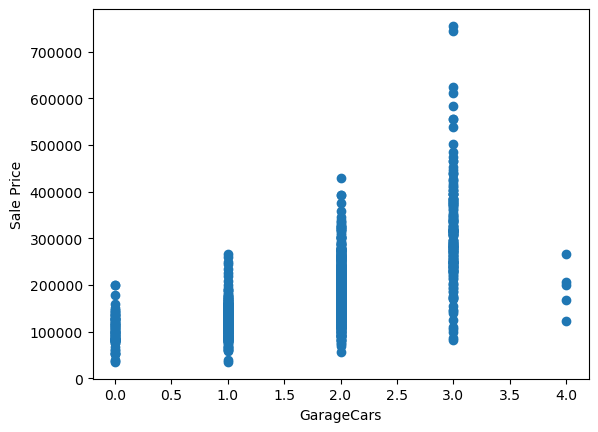

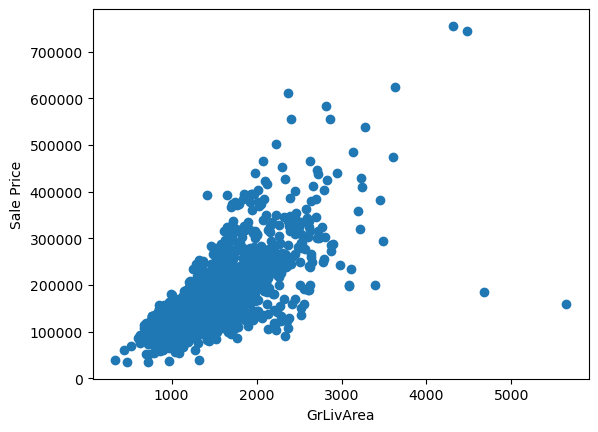

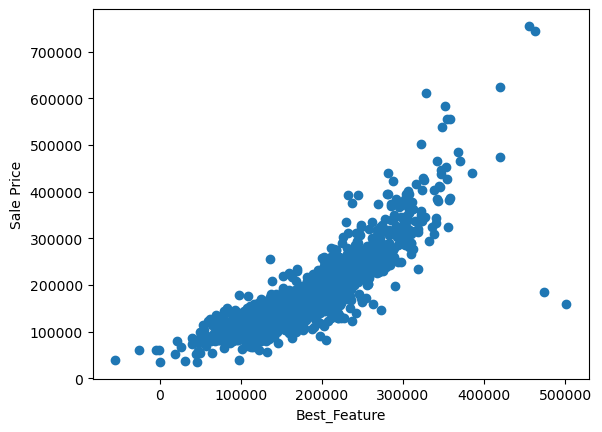

In [35]:
for feature in X_again:
    
    plt.scatter(df[feature], df['SalePrice'])
    plt.xlabel(feature)
    plt.ylabel("Sale Price")
    plt.show()

## Normalization

Now we are normalizing the dataset to see results to see if we get better results by normalizing.
We use min-max normalization.

In [34]:
df

,OverallQual,GarageCars,GrLivArea,SalePrice,GarageCond,TotRmsAbvGrd
0,7,2,1710,208500,1.5,8
1,6,2,1262,181500,1.5,6
2,7,2,1786,223500,1.5,6
3,7,3,1717,140000,1.5,7
4,8,3,2198,250000,1.5,9
...,...,...,...,...,...,...
1455,6,2,1647,175000,1.5,7
1456,6,2,2073,210000,1.5,7
1457,7,1,2340,266500,1.5,9
1458,5,1,1078,142125,1.5,5


In [58]:
df3.isna().sum()

PoolQC          1453
OverallQual        0
GarageCars         0
GrLivArea          0
SalePrice          0
GarageCond        81
TotRmsAbvGrd       0
dtype: int64

'----------------------------------------------------------------------------------------------------------------------------------------------------------------------'\
.\
.\
.

Dropping the unnecessary coloumns and nans

In [59]:
df3= df3.dropna()
df3= df3.drop('PoolQC', axis=1)

Only working with the following 3 columns which look promising. We have advanced techniques of feature selection. This was just intuitive

In [60]:
'''Only working with the following 3 columns which look promising.
We have advanced techniques of feature selection. 
This was just intuitive
'''
X_normal= df3[['OverallQual', 'GarageCars', 'GrLivArea']]
Y_normal= df3['SalePrice']

X_train_normal, X_test_normal, Y_train_normal, Y_test_normal= train_test_split(X_normal, Y_normal, test_size= 0.2, random_state=42)

In [61]:
# Here goes MinMax Normalization
normalizer= MinMaxScaler()
X_train_normal= normalizer.fit_transform(X_train_normal)
X_test_normal= normalizer.fit_transform(X_test_normal)

In [62]:
# Linear Regression model to see the performance
model_normal= LinearRegression()
model_normal.fit(X_train_normal, Y_train_normal)
Y_pred_normal= model.predict(X_test_normal)
error_normal= mean_squared_error(Y_pred_normal, Y_test_normal)
print("Error for normalized dataset is: ", error_normal)
r2_normal= r2_score(Y_test_normal, Y_pred_normal)
print("R2 score: ",r2_normal) 

Error for normalized dataset is:  86178501180.49123
R2 score:  -117.21467925993309


C:\Users\PMLS\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [63]:
X_train_normal

array([[0.25      , 0.5       , 0.36825818],
       [0.        , 0.        , 0.        ],
       [1.        , 0.5       , 1.        ],
       [1.        , 1.        , 0.74226348],
       [0.        , 0.5       , 0.23938992]])

## Outliers Removal

It seems like its the outliers that are causing our model to perform horribly. Let us remove
the outliers are retrain.

In [64]:
df3

,OverallQual,GarageCars,GrLivArea,SalePrice,GarageCond,TotRmsAbvGrd
197,8,2,3112,235000,1.5,8
810,6,2,1309,181000,1.5,5
1170,6,1,1118,171000,1.5,6
1182,10,3,4476,745000,1.5,10
1298,10,2,5642,160000,1.5,12
1386,7,2,2784,250000,1.5,12
1423,6,2,2201,274970,2.5,8


In [65]:
Q1= df3.quantile(0.25)
Q3= df3.quantile(0.75)

In [66]:
Q1

OverallQual          6.0
GarageCars           2.0
GrLivArea         1755.0
SalePrice       176000.0
GarageCond           1.5
TotRmsAbvGrd         7.0
Name: 0.25, dtype: float64

In [67]:
Q3

OverallQual          9.0
GarageCars           2.0
GrLivArea         3794.0
SalePrice       262485.0
GarageCond           1.5
TotRmsAbvGrd        11.0
Name: 0.75, dtype: float64

In [68]:
IQR= Q3-Q1

upper_limit= Q3+1.5*IQR
lower_limit= Q1-1.5*IQR

In [69]:
upper_limit

OverallQual         13.5
GarageCars           2.0
GrLivArea         6852.5
SalePrice       392212.5
GarageCond           1.5
TotRmsAbvGrd        17.0
dtype: float64

In [70]:
''' Using clipping method of outliers removal.
I generally prefer capping because with that, we lose little information 
which is mostly noise.
'''
df3= df3[(df3>=lower_limit)&(df3<= upper_limit)]

In [71]:
df3


,OverallQual,GarageCars,GrLivArea,SalePrice,GarageCond,TotRmsAbvGrd
197,8,2.0,3112,235000.0,1.5,8
810,6,2.0,1309,181000.0,1.5,5
1170,6,NaN,1118,171000.0,1.5,6
1182,10,NaN,4476,NaN,1.5,10
1298,10,2.0,5642,160000.0,1.5,12
1386,7,2.0,2784,250000.0,1.5,12
1423,6,2.0,2201,274970.0,NaN,8


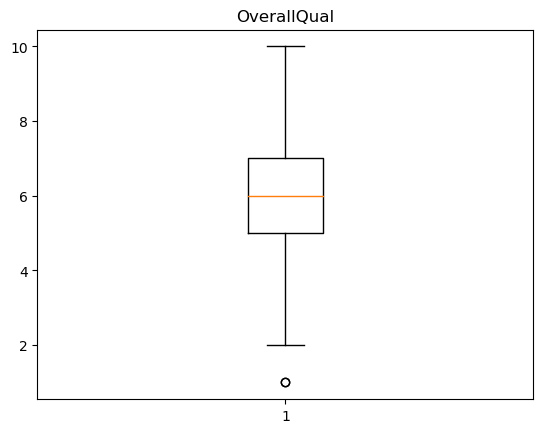

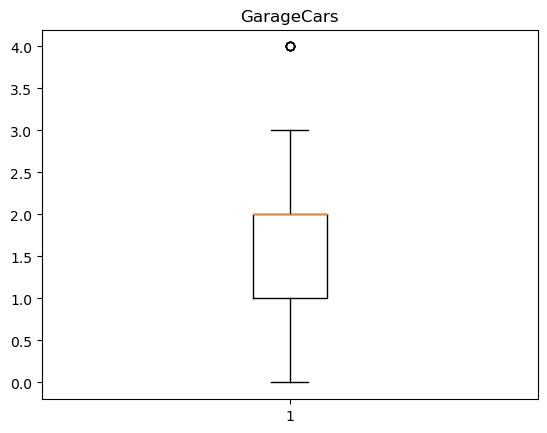

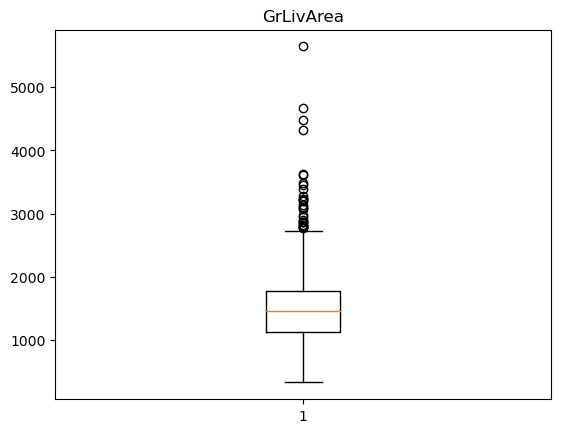

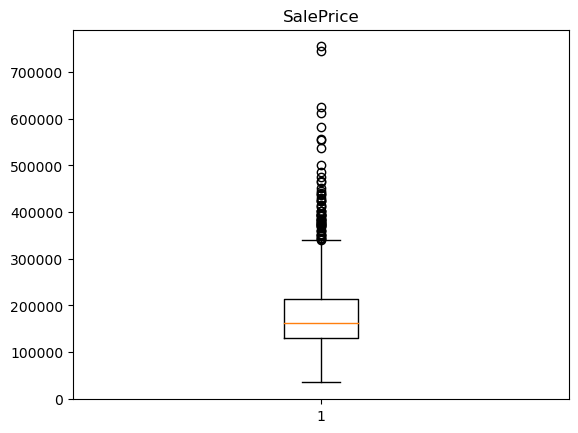

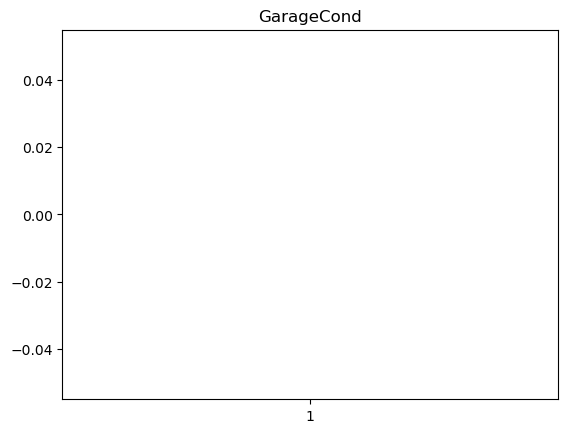

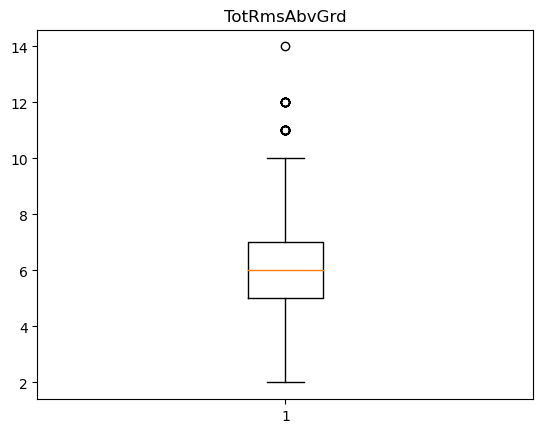

In [72]:
columns= df3.columns

for feature in columns:
   
    plt.boxplot(df[feature])
    plt.title(feature)
    plt.show()


In [73]:
iso_forest= IsolationForest(contamination= 0.1, random_state= 42)

In [74]:
df3_outliers=iso_forest.fit_predict(df3.dropna())

In [68]:
new_feature= model_filtered.predict(X_filtered)

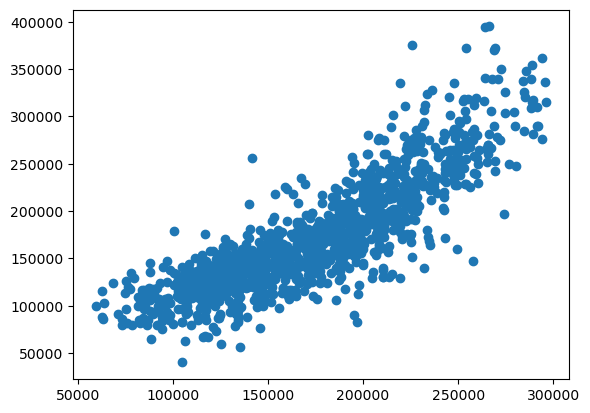

In [70]:
plt.scatter(new_feature, df3_filtered['SalePrice'])
plt.show()

In [74]:
y_pred_2= model_filtered.predict(X_test)

In [76]:
error_2= mean_squared_error(y_pred_2, Y_test)

In [77]:
print("Original error using Filtered model is: ", error_2)

Original error using Filtered model is:  2029745067.0031407


## Bias Checking

In [36]:

bias_prediction= model.predict(X_train)
error= mean_squared_error(bias_prediction, Y_train)



In [37]:
print("Error form Bias prediction from base model: ", error)

Error form Bias prediction from base model:  1603859291.9429865


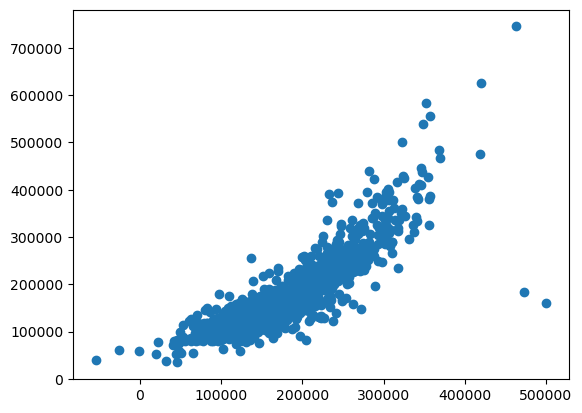

In [38]:
plt.scatter(bias_prediction, Y_test)
plt.show()

## Other Methods

We have tried multiple techniques for improving a model's performance but nothing seems to have a improve our model's performance significantly.


This suggests that we try some other models; models other than LinearRegression

Hence, we will now fit our data using multiple famous models and see if we can find any improvement in the performance.


We will start working with the previously useddata set ```df```. 

In [41]:
df

,OverallQual,GarageCars,GrLivArea,SalePrice,GarageCond,TotRmsAbvGrd
0,7,2,1710,208500,1.5,8
1,6,2,1262,181500,1.5,6
2,7,2,1786,223500,1.5,6
3,7,3,1717,140000,1.5,7
4,8,3,2198,250000,1.5,9
...,...,...,...,...,...,...
1455,6,2,1647,175000,1.5,7
1456,6,2,2073,210000,1.5,7
1457,7,1,2340,266500,1.5,9
1458,5,1,1078,142125,1.5,5


In [42]:
X_31= df[[feature for feature in df.columns if feature !='SalePrice']]
Y_31= df['SalePrice']

X31_train, X31_test, Y31_train, Y31_test= train_test_split(X_31, Y_31, test_size=0.2, random_state=42)

### Random Forest Regressor

In [44]:
forest = RandomForestRegressor(n_estimators=10,random_state= 42)
forest.fit(X31_train, Y31_train)
pred_31= forest.predict(X31_test)

error_31= mean_squared_error(pred_31, Y31_test)
print("Error in Random Forest model: ", error_31)
print("model 31 coefficients: ", model.coef_)
print("model 31 Intercepts: ", model.intercept_)

Error in Random Forest model:  1068665635.6174924
model 31 coefficients:  [27104.82597153 21298.95976754    50.67421142]
model 31 Intercepts:  -98832.49325496503


We see that Random Forest does not improve anything rather it performs worse.

In [45]:
pred_rere= model.predict(X_test)

error_31= mean_squared_error(pred_rere, Y_test)
print("Error in Random Forest model: ", error_31)

Error in Random Forest model:  1812733109.8868535


## Feature Selection Again

Before trying other models, let us add more features to our predictor features' list. Cz our funciton seems to have bias rather than variance which means it is underfitting and not properly learning


In [26]:
df_again= pd.read_csv(r"train.csv",index_col= False)

In [27]:
np.sort(df_again.columns)

array(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'Alley', 'BedroomAbvGr',
       'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath',
       'BsmtQual', 'BsmtUnfSF', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'EnclosedPorch', 'ExterCond', 'ExterQual',
       'Exterior1st', 'Exterior2nd', 'Fence', 'FireplaceQu', 'Fireplaces',
       'Foundation', 'FullBath', 'Functional', 'GarageArea', 'GarageCars',
       'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType',
       'GarageYrBlt', 'GrLivArea', 'HalfBath', 'Heating', 'HeatingQC',
       'HouseStyle', 'Id', 'KitchenAbvGr', 'KitchenQual', 'LandContour',
       'LandSlope', 'LotArea', 'LotConfig', 'LotFrontage', 'LotShape',
       'LowQualFinSF', 'MSSubClass', 'MSZoning', 'MasVnrArea',
       'MasVnrType', 'MiscFeature', 'MiscVal', 'MoSold', 'Neighborhood',
       'OpenPorchSF', 'OverallCond', 'OverallQual', 'PavedDrive',
       'PoolAre

In [28]:
df_again = df_again[['Condition2', 'BsmtQual', 'Electrical', 'KitchenQual', 'GarageCars','SalePrice']]

In [29]:
df_again

,Condition2,BsmtQual,Electrical,KitchenQual,GarageCars,SalePrice
0,Norm,Gd,SBrkr,Gd,2,208500
1,Norm,Gd,SBrkr,TA,2,181500
2,Norm,Gd,SBrkr,Gd,2,223500
3,Norm,TA,SBrkr,Gd,3,140000
4,Norm,Gd,SBrkr,Gd,3,250000
...,...,...,...,...,...,...
1455,Norm,Gd,SBrkr,TA,2,175000
1456,Norm,Gd,SBrkr,TA,2,210000
1457,Norm,TA,SBrkr,Gd,1,266500
1458,Norm,TA,FuseA,Gd,1,142125


###### From here starts a series of encoding of attributes

In [30]:
df_again['Condition2'].unique()
Condition2_mapping= {'Norm':1, 'Artery':1.5, 'RRNn':2, 'Feedr':2.5, 'PosN':3, 'PosA':3.5, 'RRAn':4, 'RRAe':4.5}
df_again['Condition2']= df_again['Condition2'].map(Condition2_mapping)

In [31]:
df_again['BsmtQual'].unique()

array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

In [32]:
BsmtQual_mapping= {'TA':1, 'Fa':1.5, 'Gd':2, 'Ex':2.5}
df_again['BsmtQual']= df_again['BsmtQual'].map(BsmtQual_mapping)

In [33]:
df_again['Electrical'].unique()
Electrical_mapping= {'SBrkr':1, 'FuseF':1.5, 'FuseA':2, 'FuseP':2.5,'Mix':3}
df_again['Electrical']= df_again['Electrical'].map(Electrical_mapping)

In [34]:
df_again['KitchenQual'].unique()
KitchenQual_mapping= {'TA':1, 'Fa':1.5, 'Gd':2, 'Ex':2.5}
df_again['KitchenQual']= df_again['KitchenQual'].map(KitchenQual_mapping)

In [35]:
df_again['GarageCars'].unique()

array([2, 3, 1, 0, 4], dtype=int64)

In [36]:
df_again.isna().sum()

Condition2      0
BsmtQual       37
Electrical      1
KitchenQual     0
GarageCars      0
SalePrice       0
dtype: int64

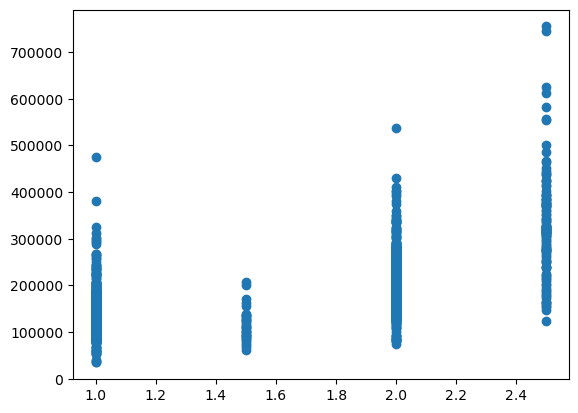

In [37]:
# Let's check the trends of Bsmt Quality with SalePrice
plt.scatter(df_again['BsmtQual'], df_again['SalePrice'])
plt.show()

### Fillings nans with relevant values according to the trend

In [38]:

for indexed,row in df_again.iterrows():
    
    if pd.isna(df_again.loc[indexed, 'BsmtQual']):
        
        if df_again.loc[indexed,'SalePrice']>400000:
            df_again.loc[indexed,'BsmtQual']= 2.50
        elif df_again.loc[indexed, 'SalePrice']>300000:
            df_again.loc[indexed,'BsmtQual']= 2.00
        else:
            df_again.loc[indexed,'BsmtQual'] =1.00
            

In [39]:
df_again.isna().sum()

Condition2     0
BsmtQual       0
Electrical     1
KitchenQual    0
GarageCars     0
SalePrice      0
dtype: int64

In [40]:
df_again= df_again.dropna()
df_again.isna().sum()


Condition2     0
BsmtQual       0
Electrical     0
KitchenQual    0
GarageCars     0
SalePrice      0
dtype: int64

In [41]:
df_again['Electrical'].unique()

array([1. , 1.5, 2. , 2.5, 3. ])

In [42]:
df.isna().sum()

OverallQual     0
GarageCars      0
GrLivArea       0
SalePrice       0
GarageCond      0
TotRmsAbvGrd    0
dtype: int64

In [43]:
df_again.isna().sum()

Condition2     0
BsmtQual       0
Electrical     0
KitchenQual    0
GarageCars     0
SalePrice      0
dtype: int64

In [44]:
df_improved= pd.concat([df,df_again], axis=1)

In [45]:
df_improved= df_improved.iloc[:,:-1]

In [46]:
df_improved


,OverallQual,GarageCars,GrLivArea,SalePrice,GarageCond,TotRmsAbvGrd,Condition2,BsmtQual,Electrical,KitchenQual,GarageCars
0,7,2,1710,208500,1.5,8,1.0,2.0,1.0,2.0,2.0
1,6,2,1262,181500,1.5,6,1.0,2.0,1.0,1.0,2.0
2,7,2,1786,223500,1.5,6,1.0,2.0,1.0,2.0,2.0
3,7,3,1717,140000,1.5,7,1.0,1.0,1.0,2.0,3.0
4,8,3,2198,250000,1.5,9,1.0,2.0,1.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
1455,6,2,1647,175000,1.5,7,1.0,2.0,1.0,1.0,2.0
1456,6,2,2073,210000,1.5,7,1.0,2.0,1.0,1.0,2.0
1457,7,1,2340,266500,1.5,9,1.0,1.0,1.0,2.0,1.0
1458,5,1,1078,142125,1.5,5,1.0,1.0,2.0,2.0,1.0


In [47]:
df_improved.isna().sum()

OverallQual     0
GarageCars      0
GrLivArea       0
SalePrice       0
GarageCond      0
TotRmsAbvGrd    0
Condition2      1
BsmtQual        1
Electrical      1
KitchenQual     1
GarageCars      1
dtype: int64

In [48]:
df_improved= df_improved.dropna()

In [49]:
X_improved=df_improved[['OverallQual', 'GarageCars', 'GrLivArea',  'GarageCond',
       'TotRmsAbvGrd', 'Condition2', 'BsmtQual', 'Electrical', 'KitchenQual',
       'GarageCars']]
Y_improved= df_improved['SalePrice']

In [50]:
X32_train, X32_test, Y32_train, Y32_test= train_test_split(X_improved, Y_improved, test_size=0.2, random_state=42)

In [51]:
print(X32_train.shape)
print(X32_test.shape)
print(Y32_train.shape)
print(Y32_test.shape)

(1167, 12)
(292, 12)
(1167,)
(292,)


In [52]:
model_improved= LinearRegression()
model_improved.fit(X32_train, Y32_train)
pred_improved= model_improved.predict(X32_test)

In [53]:
error_improved= mean_squared_error(pred_improved, Y32_test)
print("Error from Improved model: ", error_improved)

Error from Improved model:  970507175.4277244


In [54]:
pred_temporary= model_improved.predict(X_improved)

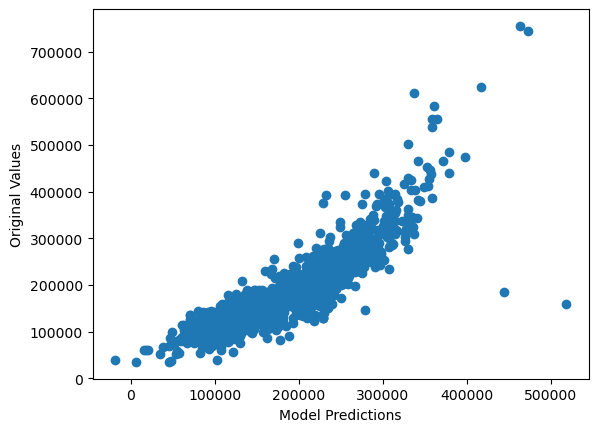

In [55]:
plt.scatter(pred_temporary, Y_improved)
plt.xlabel('Model Predictions')
plt.ylabel('Original Values')
plt.show()